# Oil Well Locations

## Introduction

In this project we aim to train a prediction model to locate the best region to explore the construction of new oil wells for OilyGiant Mining Company. Preprocessed data from oil wells located in three different regions was provided to us, and we aim to pick the best region from these three based on reservatory production volume. Each region has many possibilities of positions to place new oil wells and we expect to use the data to train a model that will be able to estimate the production volume for each position based on the preprocessed features. This model will be used to identify the best positions to place new oil wells when exploring a region and achieve the best revenues for the company.


## Data Preprocess

### Objective

The preprocessed data of each region contains three features and an id for each well position, as well as the production volume of each well position. We will check for problems in the data and fix them, in order to prepare it for a the training of the model. 

### Code

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler

import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

import joblib

In [106]:
path_array = ['', '/', '/datasets/', './datasets/', '../datasets/']
CSVPATH = None

for i in path_array:
    try:
        pd.read_csv(i + 'geo_data_0.csv', nrows=1)
        CSVPATH = i
        break
    except:
        pass

if CSVPATH:
    print('Path found is', 'current folder' if CSVPATH == '' else CSVPATH)
else:
    print('No path found')

Path found is ../datasets/


In [107]:
df = pd.read_csv(CSVPATH + 'geo_data_0.csv', nrows=5)

def optimize_types(df):
    df_dtypes = df.dtypes
    df_names = df.index
    df_types = [i.name for i in df_dtypes.values]
    df_types = dict(zip(df_names, df_types))
    return df_types

float_columns = ['f0', 'f1', 'f2', 'product']

if float_columns:
    for col in float_columns:
        df[col] = pd.to_numeric(df[col], downcast = 'float')

int_columns = [ ]

uint_columns = [ ]

if int_columns:
    for col in int_columns:
        df[col] = pd.to_numeric(df[col], downcast = 'integer')

if int_columns:
    for col in uint_columns:
        df[col] = pd.to_numeric(df[col], downcast = 'unsigned')

bool_columns = [ ]

if bool_columns:
    df[bool_columns] = df[bool_columns].astype('bool')
    
df_types = optimize_types(df)

df = []
for i in range(3):
    df.append(pd.read_csv(
            CSVPATH+'geo_data_' + str(i) +'.csv', 
            dtype=df_types))

for i in range(3):
    df[i].info()
    print('\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float32
f1         100000 non-null float32
f2         100000 non-null float32
product    100000 non-null float32
dtypes: float32(4), object(1)
memory usage: 2.3+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float32
f1         100000 non-null float32
f2         100000 non-null float32
product    100000 non-null float32
dtypes: float32(4), object(1)
memory usage: 2.3+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float32
f1         100000 non-null float32
f2         100000 non-null float32
product    100000 non-null float32
dtypes: float32(4), object(1)
memory usage:

In [108]:
for i in range(3):
    print('Number of duplicated rows for Region ' + str(i+1) + f': {df[i][df[i].duplicated()].shape[0]}')

Number of duplicated rows for Region 1: 0
Number of duplicated rows for Region 2: 0
Number of duplicated rows for Region 3: 0


In [109]:
for i in range(3):
    print('Max count of same well for Region ' + str(i+1) + ':', df[i]['id'].value_counts().max())

Max count of same well for Region 1: 2
Max count of same well for Region 2: 2
Max count of same well for Region 3: 2


In [110]:
df[0][df[0]['id'].duplicated(keep=False)].sort_values('id')

,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643326
64022,74z30,0.741456,0.459229,5.153109,140.771500
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020206
3389,A5aEY,-0.039949,0.156872,0.209861,89.249367
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370506
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828690
63593,QcMuo,0.635635,-0.473422,0.862670,64.578674
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496506


In [111]:
df[1][df[1]['id'].duplicated(keep=False)].sort_values('id')

,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813042
1305,LHZR0,11.170835,-1.945066,3.002872,80.859779
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992149
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038887
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259973,-9.376355,4.994297,134.766312


In [112]:
df[2][df[2]['id'].duplicated(keep=False)].sort_values('id')

,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211151,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716812
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233414
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968292
95090,Vcm5J,2.587702,1.986875,2.482245,92.327576
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


In [113]:
for i in range(3):
    print('Summary for dataset ' + str(i) + ':')
    display(df[i].describe().round(2))

Summary for dataset 0:


,f0,f1,f2,product
count,100000.00,100000.00,100000.00,100000.00
mean,0.50,0.25,2.50,92.50
std,0.87,0.50,3.25,44.29
min,-1.41,-0.85,-12.09,0.00
25%,-0.07,-0.20,0.29,56.50
50%,0.50,0.25,2.52,91.85
75%,1.07,0.70,4.72,128.56
max,2.36,1.34,16.00,185.36


Summary for dataset 1:


,f0,f1,f2,product
count,100000.00,100000.00,100000.00,100000.00
mean,1.14,-4.80,2.49,68.82
std,8.97,5.12,1.70,45.94
min,-31.61,-26.36,-0.02,0.00
25%,-6.30,-8.27,1.00,26.95
50%,1.15,-4.81,2.01,57.09
75%,8.62,-1.33,4.00,107.81
max,29.42,18.73,5.02,137.95


Summary for dataset 2:


,f0,f1,f2,product
count,100000.00,100000.00,100000.00,100000.00
mean,0.00,-0.00,2.50,95.00
std,1.73,1.73,3.47,44.75
min,-8.76,-7.08,-11.97,0.00
25%,-1.16,-1.17,0.13,59.45
50%,0.01,-0.01,2.48,94.93
75%,1.16,1.16,4.86,130.60
max,7.24,7.84,16.74,190.03


### Results

Data has been loaded with optimized data types and duplicates on the id columns were found. No missing values were found, but wells with duplicate ids were present. Maybe a single well was used during different periods of time or the same equipment was moved from one position to another. Because the historical data can be useful, so the information for duplicate wells ids were kept. During the training of the machine learning models, the well ids are not necessary. Next, we will take a look at the distributions and prepare our datasets for model training.


## Exploratory Data Analysis



### Objective


The exploratory data analysis consists of checking the distributions of features and the production volume of each well position. We will check how features correlate to production volume and prepare training and validation sets. We will then check for consistency before training the predictor.


### Code

In [114]:
for i in range(3):
    print('Pearson correlation for Region ' + str(i+1) + ':')
    display(df[i].drop(['id'], axis=1).corr().round(2)['product'].sort_values(ascending=False))
    print('\n')


Pearson correlation for Region 1:


product    1.00
f2         0.48
f0         0.14
f1        -0.19
Name: product, dtype: float64



Pearson correlation for Region 2:


product    1.00
f2         1.00
f1        -0.01
f0        -0.03
Name: product, dtype: float64



Pearson correlation for Region 3:


product    1.00
f2         0.45
f1        -0.00
f0        -0.00
Name: product, dtype: float64

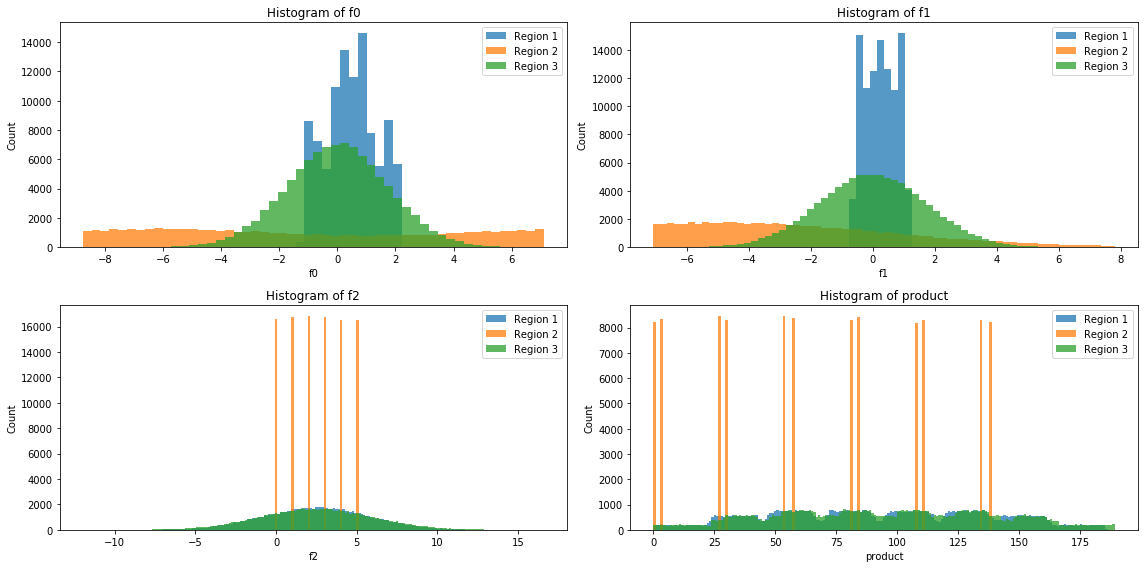

In [115]:
histogram_plots = ['f0', 'f1', 'f2', 'product']
legend = ['Region 1', 'Region 2', 'Region 3']
title = ['Histogram of f0', 'Histogram of f1', 'Histogram of f2', 'Histogram of product']
fig, axs = plt.subplots(2,2)
fig.set_size_inches(16, 8)
fig.set_tight_layout(True)

for (col, t) in zip(histogram_plots, title):
    
    ## Plotting histograms with same bins
    maxrange = 0
    for i in range(3):
        compare = abs(df[i][col].max() - df[i][col].min())
        if compare > maxrange:
            maxrange = compare
            bin_set = i
    bin = np.arange(df[i][col].min(), df[i][col].max(), maxrange/200)
    
    if histogram_plots.index(col) < 2:
        for i in range(3):
            axs[0, histogram_plots.index(col)].hist(df[i][col], bins=bin, alpha=0.75)
        axs[0, histogram_plots.index(col)].legend(legend)
        axs[0, histogram_plots.index(col)].set(ylabel = 'Count', xlabel = col, title=t)
    else:  
        for i in range(3): 
            axs[1, histogram_plots.index(col)-2].hist(df[i][col], bins=bin, alpha=0.75)
        axs[1, histogram_plots.index(col)-2].legend(legend)
        axs[1, histogram_plots.index(col)-2].set(ylabel = 'Count', xlabel = col, title=t)
        
plt.show()

*Graph Analysis*

By looking at the graphs above, we have an overview of feature and production values. It is clear that every region has different distributions. Region 2 follows an odd pattern of production values, which is not consistent with the other regions, and production volumes are generally very close to six possible values which are mainly defined by feature "f2". As for Region 1 and Region 3, both show similar distributions of production values, with their own peculiarities for features. 

In [116]:
scaler = []

for i in range(3):
    scaler.append(StandardScaler())
    scaler[i].fit(df[i].drop(['id', 'product'], axis=1))
    df[i].loc[:, ['f0', 'f1', 'f2']] = scaler[i].transform(df[i].drop(['id', 'product'], axis=1))
    df[i].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float32
dtypes: float32(1), float64(3), object(1)
memory usage: 3.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float32
dtypes: float32(1), float64(3), object(1)
memory usage: 3.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float32
dtypes: float32(1), flo

In [117]:
train = []
valid = []

for i in range(3):
    x, y = train_test_split(df[i], test_size=0.25, shuffle=True, random_state=42)
    train.append(x)
    valid.append(y)
    
for i in range(3):
    print(f'Size of train dataset for Region {i+1}:', train[i].shape[0])
    print(f'Size of test dataset for Region {i+1}:', valid[i].shape[0], end='\n\n')

Size of train dataset for Region 1: 75000
Size of test dataset for Region 1: 25000

Size of train dataset for Region 2: 75000
Size of test dataset for Region 2: 25000

Size of train dataset for Region 3: 75000
Size of test dataset for Region 3: 25000



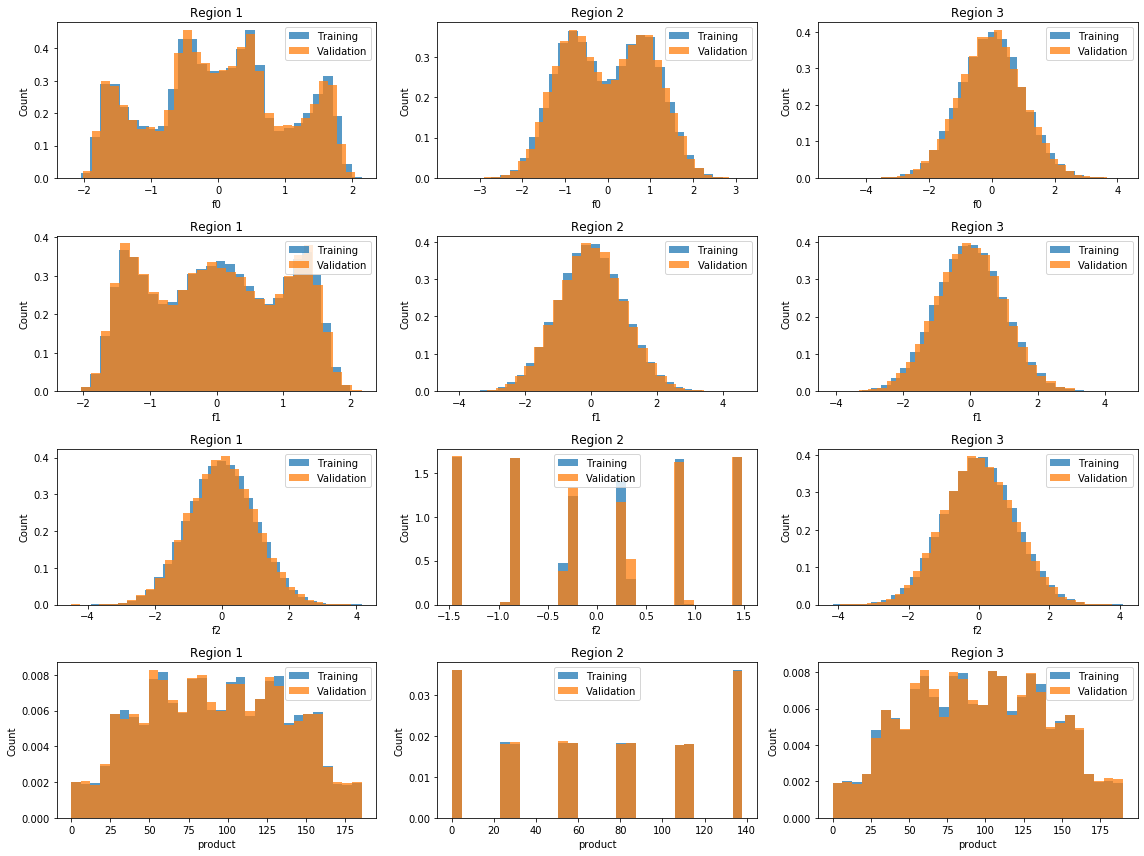

In [118]:
histogram_plots = ['f0', 'f1', 'f2', 'product']
legend = ['Training', 'Validation']
title = ['Region 1', 'Region 2', 'Region 3']
fig, axs = plt.subplots(4,3)
fig.set_size_inches(16, 12)
fig.set_tight_layout(True)

for col in range(4):
    for i in range(3):
        axs[col, i].hist(train[i][histogram_plots[col]], bins=30, alpha=0.75, density=True)
        axs[col, i].hist(valid[i][histogram_plots[col]], bins=30, alpha=0.75, density=True)
        axs[col, i].legend(legend)
        axs[col, i].set(ylabel = 'Count', xlabel = histogram_plots[col], title=title[i])

plt.show()

*Graph Analysis*

The above graphs show the distributions for all three regions in the training and test sets, to see if the data is consistent. This confirms that the training and validation sets show similar distributions and are not biased.

### Results

The main findings of the exploratory data analysis are:
    - The production values are not consistent across regions.
    - Region 2 has its production values mainly defined by feature "f2".
    - Region 2 generally has lower values for prodution than the other regions.
    - Region 3 shows slightly higher values for production than Region 1.

## Model Training

### Objective

A linear regression model will now be trained to predict the production volume for each well position based on the features. The model will be trained on the training set and tested on the validation set. The model will be tested on the test set to see if it is able to predict the production volume for each oil well position and we will check scores for each model to decide on the best model.

### Code

In [119]:
def target_features(df, tar_col, remove=[]):
    target = df[tar_col]
    remove.append(tar_col)
    features = df[[x for x in train[i].columns.values if x not in remove]]
    return target, features

In [120]:
def find_level(model, param, level=10):
    best = {
        'i': -1, 
        'score': -1
    }
    for i in range(1, level+1):
        setattr(model, param, i)
        model.fit(train_feat, train_target)
        score = model.score(valid_feat, valid_target)
        if (score - best['score']) > 0.001:
            best['score'] = score
            best['i'] = i
    return best['score'], best['i']

def report(target, features=None, predictions=None, model=None, predictions_proba=None, classifier=True):
    """
    Prints a report of the model's performance. If regressor, add classifier=False
    """
    flag = 0
    if model != None:
        if predictions is not None:
            warnings.warn('Both model and predictions were passed. Ignoring model.')
        else:
            if features is None:
                raise ValueError('Features must be passed if model is passed.')
            predictions = model.predict(features)
            if classifier == True:
                predictions_proba = model.predict_proba(features)
    if predictions is not None:
        if classifier == True:
            print(f'Accuracy: {metrics.accuracy_score(target,predictions):.2%}') 
            print(f'Recall: {metrics.recall_score(target,predictions):.2%}')
            print(f'Precision: {metrics.precision_score(target,predictions):.2%}')
            print(f'F1 Score: {metrics.f1_score(target,predictions):.2%}')
        elif classifier == False:
            print(f'Mean Absolute Error: {metrics.mean_absolute_error(target,predictions):.2f}')
            print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(target,predictions)):.2f}') 
            print(f'R2 Score: {metrics.r2_score(target,predictions):.2f}')
            print(f'Predictions mean value: {np.mean(predictions):.2f} (Target mean is {np.mean(target):.2f})')
            print(f'Predictions median value: {np.median(predictions):.2f} (Target median is {np.median(target):.2f})')
            target = pd.Series(target).reset_index(drop=True).sort_values()
            predictions = pd.Series(predictions)
            predictions = predictions.iloc[target.index].reset_index(drop=True)
            target = target.reset_index(drop=True)
            plt.plot(predictions, label='Predicted')
            plt.plot(target, label='Actual', color='orange')
            plt.legend(['Predicted', 'Actual'])
            plt.xlabel('Sample Number')
            plt.show()
    if predictions_proba is not None:
        fpr, tpr, thresholds = metrics.roc_curve(target, predictions_proba[:,1])
        print(f'AUC-ROC: {metrics.roc_auc_score(target,predictions_proba[:,1]):.2%}')
        flag = 1
    if flag == 1:
        return fpr, tpr, thresholds, predictions
    else:
        return predictions

In [121]:
train_target = []
train_feat = []
for i in range(3):
    x, y = target_features(train[i], 'product', remove=['id'])
    train_target.append(x)
    train_feat.append(y)

valid_target = []
valid_feat = []
for i in range(3):
    x, y = target_features(valid[i], 'product', remove=['id'])
    valid_target.append(x)
    valid_feat.append(y)

Report of linear model for Region 1:
Mean Absolute Error: 31.05
Root Mean Squared Error: 37.76
R2 Score: 0.27
Predictions mean value: 92.40 (Target mean is 92.33)
Predictions median value: 92.41 (Target median is 90.79)


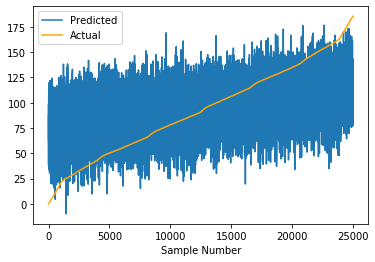



Report of linear model for Region 2:
Mean Absolute Error: 0.72
Root Mean Squared Error: 0.89
R2 Score: 1.00
Predictions mean value: 68.71 (Target mean is 68.73)
Predictions median value: 57.92 (Target median is 57.09)


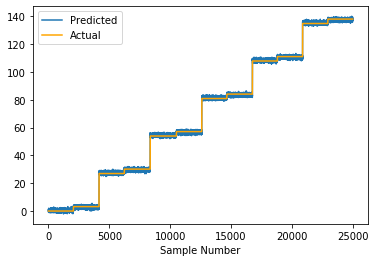



Report of linear model for Region 3:
Mean Absolute Error: 32.90
Root Mean Squared Error: 40.15
R2 Score: 0.20
Predictions mean value: 94.77 (Target mean is 95.15)
Predictions median value: 94.61 (Target median is 94.94)


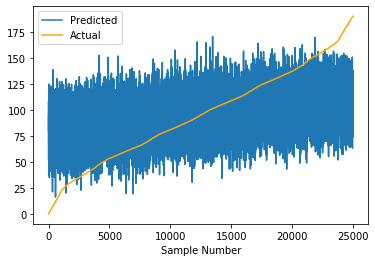

In [122]:
# Launching linear model
linear_model = []
for i in range(3):
    linear_model.append(LinearRegression(normalize=True))

valid_predict = []
for i in range(3):
    print(f'Report of linear model for Region {i+1}:')
    linear_model[i].fit(train_feat[i], train_target[i])
    valid_predict.append(report(valid_target[i], features=valid_feat[i], model=linear_model[i], classifier=False))
    print('\n')

*Graph Analysis*

The reports for each model suggest that model 1 performs better than the other models to predict the production volume for each well position. The model 1 has a higher R2 score, which higher than the other models. Although the linear regression model could succesfully predict all values for Region 2, this region shows the worst results for the production volume.

### Results

Linear regression prediction models were trained for each of the three regions. The model 1 has a higher R2 score than the other models, and shows a high average value for production, which suggests this will be a safer choice to correctly predict profit for the company. However, a closer look to the maximum possible revenue should be looked into, as the average value for production was somewhat higher for Region 3. Generally, Region 2 shows the worst results, although the prediction model can succesfully predict all values for this region.

## Viability Study

### Objective

In this section we seek to calculate profit based on the prediction models and distributions for each region. Before building wells, a study of 500 points is carried for picking the best 200 points for the profit calculation. The construction of these 200 oil wells will cost 100 million USD. One barrel of production brings 4.5 USD of revenue, and the volume of product is in thousands of barrels. The profit for each well position is calculated by multiplying the production volume by the revenue per barrel. We will simulate samples of 500 points for each region and calculate average profit for the best 200 points.

A description of the testing procedure:

    - Apply bootstrapping for 1000 samples of 500 points for each region.
    - Predict the revenue for each of the 500 points and sort them in descending order.
    - Pick the best 200 oil wells from these 500 points, based on the predicted revenue.
    - Calculate the profit of the 200 oil wells based on the true values of production volume.
    - Perform a sanity check to assess the performance of the ML models.


### Code

In [123]:
cost_per_well = 100 * 10**6 / 200
barrels_to_pay_itself = cost_per_well / 4.5
production_to_pay_itself = barrels_to_pay_itself / 1000

print(f'Cost per well: {int(cost_per_well):,} USD')
print(f'Each well must produce at least {production_to_pay_itself:.2f} thousand barrels on average to pay for itself ({production_to_pay_itself*4500:,.0f} USD)')
for i in range(3):
    print(f'The average production of Region {i+1} is {df[i]["product"].mean():.2f} thousand of barrels ({df[i]["product"].mean()*4500:,.0f} USD) ')

Cost per well: 500,000 USD
Each well must produce at least 111.11 thousand barrels on average to pay for itself (500,000 USD)
The average production of Region 1 is 92.50 thousand of barrels (416,250 USD) 
The average production of Region 2 is 68.82 thousand of barrels (309,712 USD) 
The average production of Region 3 is 95.00 thousand of barrels (427,500 USD) 


In [124]:
def revenue(wells, quantity):
    profit = wells[:quantity].sum() * 4500
    return profit

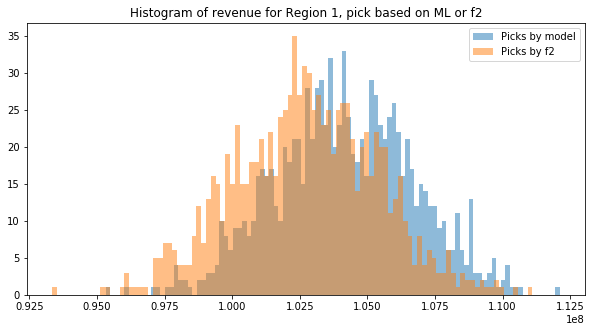

Average profit using ML model : 4,158,585.55 USD (as opposed to average profit of 2,739,406.92 USD by picking based on f2)
Average well production using ML model is: 115.73 thousand barrels
Risk of losses by using ML model is 5.30% (as opposed to  16.20% by picking based on f2)
Confidence interval of revenue by using ML model is: 99,363,051.78 USD to 108,978,791.97 USD


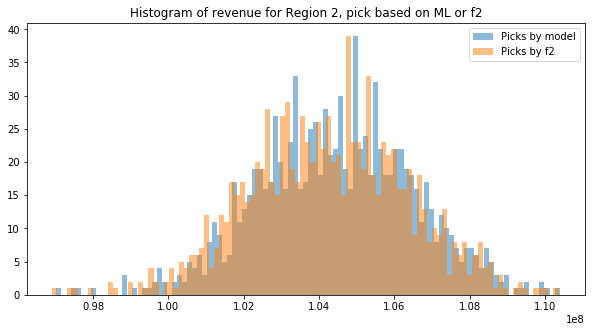

Average profit using ML model : 4,459,496.22 USD (as opposed to average profit of 4,247,086.93 USD by picking based on f2)
Average well production using ML model is: 116.07 thousand barrels
Risk of losses by using ML model is 1.80% (as opposed to  2.00% by picking based on f2)
Confidence interval of revenue by using ML model is: 100,509,860.96 USD to 108,394,588.92 USD


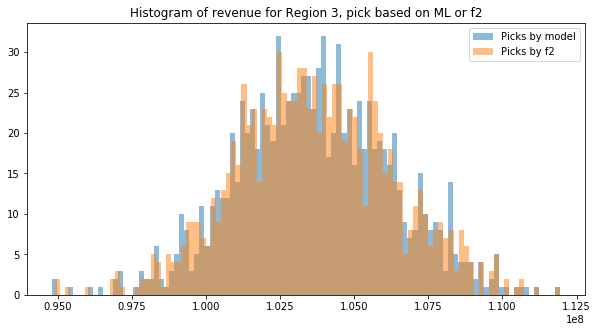

Average profit using ML model : 3,672,658.84 USD (as opposed to average profit of 3,657,949.81 USD by picking based on f2)
Average well production using ML model is: 115.19 thousand barrels
Risk of losses by using ML model is 7.30% (as opposed to  7.70% by picking based on f2)
Confidence interval of revenue by using ML model is: 98,464,434.74 USD to 108,843,245.73 USD


In [125]:
state = np.random.RandomState(1995)

for j in range(3):
    values = []
    values2 = [] 
    for i in range(1000):
        subsample = df[j].sample(n=500, replace=True, random_state=state)
        predict = linear_model[j].predict(subsample[['f0', 'f1', 'f2']])
        predict = pd.Series(predict)
        predict.index = subsample.index
        predict = predict.sort_values(ascending=False)
        values.append(
            revenue(
                df[j].loc[predict.index]['product'],
                200
                )
            )
        values2.append(
            revenue(
                subsample.sort_values(by='f2', ascending=False)['product'],
                200
            )
        )
    
    values = pd.Series(values)
    values2 = pd.Series(values2)
    
    plt.figure(figsize=(10,5))
    plt.hist(values, bins=100, alpha=0.5)
    plt.hist(values2, bins=100, alpha=0.5)
    plt.title(f'Histogram of revenue for Region {j+1}, pick based on ML or f2')
    plt.legend(['Picks by model', 'Picks by f2'])
    plt.show()
    
    print(f'Average profit using ML model : {values.mean() - 100000000:,.2f} USD (as opposed to average profit of {values2.mean() - 100000000:,.2f} USD by picking based on f2)')
    print(f'Average well production using ML model is: {values.mean()/4500/200:,.2f} thousand barrels')
    print(f'Risk of losses by using ML model is {values.where(values < 10**8).dropna().shape[0]/values.shape[0]:.2%} (as opposed to  {values2.where(values2 < 10**8).dropna().shape[0]/values2.shape[0]:.2%} by picking based on f2)')
    print(f'Confidence interval of revenue by using ML model is: {values.quantile(0.025):,.2f} USD to {values.quantile(0.975):,.2f} USD')


*Graph Analysis*

The main findings of this simulation are listed below:

    - Picking oill wells at random from the 500 points for each region will generally result in big losses.
    - The linear model predictions are mainly based on values of feature "f2".
    - Regions 1 and 3 have oil wells with higher values for production, but they are harder to identify.
    - Region 2 has the bet compromise of value with lower risks of losses. Therefore, it is the best region for exploration.
    - The risks of losses are only 1.80% for Region 2, while risks are much higher for other Regions.

### Results

In this section, we have calculated target values of production for wells, and compared to the building costs. It turns out that identifying the best well to build based on the provided features is not an easy task for the model, and the results do not provide the best possible profits. However, it is possible to guarantee a low risk of losses for the company by picking Region 2 and applying the linear model to the 500 positions in the study cases. An average profit of approximately 4,5 million USD was calculated for the 200 wells with highest estimated production. This is not a high profit value, but it is still a good estimate for the company to ensure safety a profitable operation. The other regions show high probability of losses without better models, which could be achieved by providing better data regarding features of wells.

## Conclusion

In this study, a linear regression model was trained for each of three regions in order to pick the best region for oil exploration. They will be used to predict the best positions to place oil wells from 500 point of a study case. Three features for each region were provided, with very different distributions for each region. None of these features had big issues regarding quality of the data, except for duplicates in well ids, which could happen to a number of logical reasons, including the same equipment being used in different conditions.

The machine learning models were generated as linear models as per requirement. These models generally showed low scores for prediction, with exception of Region 2 which could achieve the best value of 1.0. Additionally, models for Region 1 and Region 3 showed mean absolute errors of 30 while the mean values of preidctions were 90. This suggests that these models are not very successful at predicting oil well production. On the other hand, Region 1 and Region 3 also show the best average production when compared to Region 2, although the specific wells that can achieve optimized results are not easy to identify. 

After creating a distribution of profit and calculating risks of losses, Region 2 performs better than the others with an average profit of about 4,5 million USD. Correlation of features and target in Region 2 is very high, such that using the f2 feature for prediction is a good choice. However, after calculating revenues for the 200 wellls by means of bootstrapping, the prediction model can achieve slightly better results than prediction based solely on feature f2. The same simulation shows that risks of losses are only 1.80% for Region 2, while risks are much higher for other Regions. These results require applying the model to identify the best oil wells to build.

In conclusion, we could achieve an expected profit of approximately 4,5 million USD for the company, with confidence interval of 95% ranging from half a million USD to 8 million USD. Guaranteeing a very low risk of losses. This result should be used to go through a safe method to ensure profit when exploring oil wells. Simulations show that picking wells at random from the 500 points for each region will generally result in very big losses, and this practice is not advised. To provide better results, models could be improved by using more data of other possible features. In that way, exploration of Region 1 and Region 3 could be more advisable, since those regions have the best average production.